## 1. Tìm hiểu dữ liệu

In [ ]:
from google.colab import drive #import thư mục trong Google Drive vào Colab
drive.mount('/content/drive') #mount vào thư mục content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from itertools import combinations as comb
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score, classification_report

In [ ]:
# read training and test data
# Phương
# df = pd.read_csv("/content/drive/MyDrive/Cá nhân/TLS/Môn học/Khai phá dữ liệu/Khai phá dữ liệu - Phân loại/Credit-score/credit-score-train.csv", low_memory=False)

# Đức
df = pd.read_csv("/content/drive/MyDrive/Khai Pha Du Lieu/credit-score-train.csv", low_memory=False)

In [ ]:
# print training data
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [ ]:
# Mô tả data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
# mo ta cot co kieu du lieu object
df.select_dtypes('object').describe().T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [ ]:
df_cp = df

## 2. Thay thế các giá trị không hợp lệ

In [ ]:
# Kiểm tra các giá trị dữ liệu còn thiếu (null)
df_cp.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
# Loại bỏ các dòng chứa giá trị null
df_cp.dropna(axis = 0, inplace=True)
df_cp.isnull().sum()
df_cp.shape

(53049, 28)

## 3. Chuyển đổi sữa liệu lỗi

In [ ]:
# Kiểm tra duy nhất để tìm giá trị bị thiếu hoặc dữ liệu không chính xác
for i in df_cp:
  print('\n',i,df_cp[i].nunique())
  print('\n',i,df_cp[i].unique()) # unique() trả về danh sách các giá trị duy nhất của cột đó


 ID 53049

 ID ['0x1602' '0x1608' '0x160e' ... '0x25fea' '0x25feb' '0x25fed']

 Customer_ID 11071

 Customer_ID ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

 Month 8

 Month ['January' 'July' 'February' 'March' 'May' 'June' 'August' 'April']

 Name 9168

 Name ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

 Age 1057

 Age ['23' '28_' '28' ... '8425' '2263' '1342']

 SSN 11064

 SSN ['821-00-0265' '004-07-5839' '486-85-3974' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

 Occupation 16

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Mechanic' 'Writer'
 'Accountant' 'Architect' 'Musician' 'Developer']

 Annual_Income 14707

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Monthly_Inhand_Salary 11628

 Monthly_Inhand_Salary [ 1824.84333333  3037.98666667 12187.22       ...  3097

In [ ]:
# # Bỏ cột nằm ngoài phạm vi mô hình

# Bỏ cột nằm ngoài phạm vi mô hình
delete_col = ['ID', 'Customer_ID', 'Name','SSN', 'Type_of_Loan']
df_cp = df_cp.drop(delete_col , axis=1).copy()
df_cp.shape

(53049, 23)

In [ ]:

# Loại bỏ các ký tự đặc biệt
# lambda sẽ kiểm tra xem 1 giá trị bất kỳ trong df có phải là NaN hoặc không phải là chuỗi hay không
# Nếu không phải chuỗi, phần tử đó sẽ được giữ nguyên giá trị
# Nếu là chuỗi, hàm lambda sẽ loại bỏ các ký tự _ ," đầu và cuối chuỗi, 
# sau đó thay thế các giá trị chuỗi đã xác định trước (như '', '_ ', '-', ...) bằng giá trị NaN.
df_cp = df_cp.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else 
                 str(x).strip('_ ,"')).replace(['',
                                                '_',
                                                '-', 
                                                '-333333333333333333333333333'
                                                ,'nan', 
                                                '__10000__',
                                                '!@9#%8', 
                                                '#F%$D@*&8'], np.NaN)

df_cp = df_cp.dropna() # Xóa các hàng chứa giá trị NaN
df_cp.shape

(35712, 23)

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35712 entries, 6 to 99997
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     35712 non-null  object 
 1   Age                       35712 non-null  object 
 2   Occupation                35712 non-null  object 
 3   Annual_Income             35712 non-null  object 
 4   Monthly_Inhand_Salary     35712 non-null  float64
 5   Num_Bank_Accounts         35712 non-null  int64  
 6   Num_Credit_Card           35712 non-null  int64  
 7   Interest_Rate             35712 non-null  int64  
 8   Num_of_Loan               35712 non-null  object 
 9   Delay_from_due_date       35712 non-null  int64  
 10  Num_of_Delayed_Payment    35712 non-null  object 
 11  Changed_Credit_Limit      35712 non-null  object 
 12  Num_Credit_Inquiries      35712 non-null  float64
 13  Credit_Mix                35712 non-null  object 
 14  Outsta

In [ ]:
# Chuyển đổi kiểu dữ liệu của một số cột
df_cp['Monthly_Balance'] = df_cp.Monthly_Balance.astype(float)

df_cp['Total_EMI_per_month'] = df_cp.Total_EMI_per_month.astype(float)

df_cp['Annual_Income'] = df_cp.Annual_Income.astype(float)

df_cp['Outstanding_Debt'] = df_cp.Outstanding_Debt.astype(float)

df_cp['Age'] = df_cp.Age.astype(float)

df_cp['Num_of_Delayed_Payment'] =df_cp['Num_of_Delayed_Payment'].astype(float)

df_cp['Monthly_Balance'] = df_cp['Monthly_Balance'].round(decimals = 2)

df_cp['Total_EMI_per_month'] = df_cp['Total_EMI_per_month'].round(decimals = 2)

df_cp['Annual_Income'] = df_cp['Annual_Income'].round(decimals = 2)

<ipython-input-67-2f9cabfbfb0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp['Monthly_Balance'] = df_cp.Monthly_Balance.astype(float)
<ipython-input-67-2f9cabfbfb0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp['Total_EMI_per_month'] = df_cp.Total_EMI_per_month.astype(float)
<ipython-input-67-2f9cabfbfb0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
df_cp.describe(include=['float64', 'int64'], percentiles=[0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance
count,35712.000000,3.571200e+04,35712.000000,35712.000000,35712.000000,35712.000000,35712.000000,35712.000000,35712.000000,35712.000000,35712.000000,35712.000000,35712.000000
mean,113.324261,1.783545e+05,4035.917619,17.144461,22.645889,77.420531,21.981743,32.190216,27.025314,1506.050175,32.215429,1409.637649,383.145671
std,703.827418,1.453689e+06,3100.747953,118.672122,128.464715,483.975669,15.225046,230.793358,186.858323,1191.521764,5.051518,8240.561528,195.500216
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-5.000000,-3.000000,0.000000,0.230000,20.881250,4.460000,0.450000
50%,33.000000,3.617894e+04,2996.280833,6.000000,6.000000,15.000000,19.000000,14.000000,6.000000,1235.480000,32.250622,78.580000,325.580000
90%,49.000000,1.082236e+05,8700.397500,9.000000,9.000000,30.000000,47.000000,22.000000,12.000000,3388.335000,38.898555,287.940000,657.259000
91%,50.000000,1.132848e+05,9075.206467,9.000000,9.000000,30.000000,49.000000,22.000000,12.000000,3531.000000,39.093009,302.020000,680.820100
92%,50.000000,1.186369e+05,9440.008938,9.000000,9.000000,31.000000,50.000000,23.000000,12.000000,3680.918400,39.294159,324.231200,707.324800
93%,51.000000,1.227136e+05,9885.503333,10.000000,10.000000,32.000000,52.000000,23.000000,12.000000,3842.370000,39.535917,347.570000,736.598400
94%,52.000000,1.267699e+05,10194.650733,10.000000,10.000000,32.000000,53.000000,23.000000,13.000000,4020.012800,39.790856,380.654000,766.293800


In [ ]:
# age: loại bỏ tuổi nhỏ hơn 0 và lớn hơn 120
df_cp = df_cp.drop(df_cp[(df_cp['Age'] < 0) | (df_cp['Age'] > 120)].index)

# Num_Bank_Accounts: loại bỏ nhỏ hơn 0
df_cp = df_cp.drop(df_cp[(df_cp['Num_Bank_Accounts'] < 0)].index)

# Delay_from_due_date: loại bỏ nhỏ hơn 0
df_cp = df_cp.drop(df_cp[(df_cp['Delay_from_due_date'] < 0)].index)

# Num_of_Delayed_Payment: loại bỏ nhỏ hơn 0
df_cp = df_cp.drop(df_cp[(df_cp['Num_of_Delayed_Payment'] < 0)].index)

In [ ]:
df_cp.describe(include=['float64', 'int64'], percentiles=[0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance
count,34345.000000,3.434500e+04,34345.000000,34345.000000,34345.000000,34345.000000,34345.000000,34345.000000,34345.000000,34345.000000,34345.000000,34345.000000,34345.000000
mean,32.925055,1.784222e+05,4010.363566,17.200844,22.704877,77.511370,22.186985,32.363634,27.215694,1514.651621,32.215636,1419.013480,381.689468
std,10.699320,1.458637e+06,3079.653577,119.019166,128.592266,484.006582,15.168019,230.814677,187.436649,1194.332229,5.051386,8270.951549,193.957961
min,14.000000,7.005930e+03,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.230000,20.881250,4.460000,0.450000
50%,33.000000,3.597151e+04,2980.381667,6.000000,6.000000,15.000000,19.000000,14.000000,6.000000,1246.990000,32.246009,78.410000,324.990000
90%,47.000000,1.074389e+05,8637.975000,9.000000,9.000000,30.000000,47.000000,22.000000,12.000000,3409.130000,38.899354,287.132000,653.056000
91%,48.000000,1.122879e+05,8997.257500,9.000000,9.000000,31.000000,49.000000,22.000000,12.000000,3539.880000,39.093304,301.840000,676.030400
92%,49.000000,1.177535e+05,9328.017500,9.000000,9.000000,31.000000,50.000000,23.000000,12.000000,3696.360000,39.292692,323.620000,702.342400
93%,50.000000,1.221328e+05,9823.906667,10.000000,10.000000,32.000000,52.000000,23.000000,12.000000,3856.468800,39.534717,347.567600,731.094000
94%,51.000000,1.262788e+05,10145.416667,10.000000,10.000000,32.000000,53.000000,23.000000,13.000000,4047.310000,39.789105,379.200000,760.063200


In [ ]:
df_cp

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,July,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.57,178.3440674122349,Low_spent_Small_value_payments,244.57,Good
9,February,28.0,Teacher,34847.84,3037.986667,2,4,6,1,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.82,40.39123782853101,High_spent_Large_value_payments,484.59,Good
12,May,28.0,Teacher,34847.84,3037.986667,2,4,6,1,3,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.82,130.11542024292334,Low_spent_Small_value_payments,444.87,Good
13,June,28.0,Teacher,34847.84,3037.986667,2,4,6,1,3,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.82,43.477190144355745,High_spent_Large_value_payments,481.51,Good
15,August,28.0,Teacher,34847.84,3037.986667,2,4,6,1,3,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.82,218.90434353388733,Low_spent_Small_value_payments,356.08,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,June,50.0,Writer,37188.10,3097.008333,1,4,5,3,5,...,Good,620.64,37.753013,30 Years and 2 Months,NM,84.21,147.33990786653956,Low_spent_Small_value_payments,368.15,Good
99984,January,28.0,Architect,20002.88,1929.906667,10,8,29,5,35,...,Bad,3571.70,22.895966,5 Years and 8 Months,Yes,60.96,43.37067007268804,High_spent_Large_value_payments,328.66,Poor
99985,February,28.0,Architect,20002.88,1929.906667,10,8,29,5,33,...,Bad,3571.70,39.772607,5 Years and 9 Months,Yes,12112.00,148.2752327451465,Low_spent_Small_value_payments,273.75,Poor
99991,August,29.0,Architect,20002.88,1929.906667,10,8,29,5,33,...,Bad,3571.70,37.140784,6 Years and 3 Months,Yes,60.96,34.66290609052614,High_spent_Large_value_payments,337.36,Standard


In [ ]:
# chuyển đổi đơn vị năm tháng sang năm, ví dụ 1 năm 6 tháng thành 1,5 năm
def convert_to_years(val):
    year, month = val.split(" Years and ")
    month = month.replace(" Months", "")
    return float(year) + float(month)/12

# sử dụng hàm convert_to_years để chuyển đổi đơn vị cho cột 'Credit_History_Age'
df_cp['Credit_History_Age'] = df_cp['Credit_History_Age'].apply(convert_to_years)
df_cp

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,July,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,809.98,22.537593,22.583333,No,49.57,178.3440674122349,Low_spent_Small_value_payments,244.57,Good
9,February,28.0,Teacher,34847.84,3037.986667,2,4,6,1,7,...,Good,605.03,38.550848,26.666667,No,18.82,40.39123782853101,High_spent_Large_value_payments,484.59,Good
12,May,28.0,Teacher,34847.84,3037.986667,2,4,6,1,3,...,Good,605.03,34.977895,26.916667,No,18.82,130.11542024292334,Low_spent_Small_value_payments,444.87,Good
13,June,28.0,Teacher,34847.84,3037.986667,2,4,6,1,3,...,Good,605.03,33.381010,27.000000,No,18.82,43.477190144355745,High_spent_Large_value_payments,481.51,Good
15,August,28.0,Teacher,34847.84,3037.986667,2,4,6,1,3,...,Good,605.03,32.933856,27.166667,No,18.82,218.90434353388733,Low_spent_Small_value_payments,356.08,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,June,50.0,Writer,37188.10,3097.008333,1,4,5,3,5,...,Good,620.64,37.753013,30.166667,NM,84.21,147.33990786653956,Low_spent_Small_value_payments,368.15,Good
99984,January,28.0,Architect,20002.88,1929.906667,10,8,29,5,35,...,Bad,3571.70,22.895966,5.666667,Yes,60.96,43.37067007268804,High_spent_Large_value_payments,328.66,Poor
99985,February,28.0,Architect,20002.88,1929.906667,10,8,29,5,33,...,Bad,3571.70,39.772607,5.750000,Yes,12112.00,148.2752327451465,Low_spent_Small_value_payments,273.75,Poor
99991,August,29.0,Architect,20002.88,1929.906667,10,8,29,5,33,...,Bad,3571.70,37.140784,6.250000,Yes,60.96,34.66290609052614,High_spent_Large_value_payments,337.36,Standard


In [ ]:
# Ánh xạ các Credit_Mix từ chuỗi sang số
Credit_Mix_mapping = {'Bad': 1, 'Standard': 2, 'Good': 3}
df_cp['Credit_Mix'] = df_cp['Credit_Mix'].map(Credit_Mix_mapping)

In [ ]:
# Ánh xạ các nghề nghiệp từ chuỗi sang số
occupation_mapping = {'Scientist': 1, 'Teacher': 2, 'Engineer': 3, 'Entrepreneur': 4, 'Lawyer': 5,
                      'Media_Manager': 6, 'Doctor': 7, 'Journalist': 8, 'Manager': 9, 'Mechanic': 10, 'Writer': 11,
                      'Accountant': 12, 'Architect': 13, 'Musician': 14, 'Developer': 15}
df_cp['Occupation'] = df_cp['Occupation'].map(occupation_mapping)


In [ ]:
# Ánh xạ các tháng từ chuỗi sang số
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df_cp['Month'] = df_cp['Month'].map(month_map)

In [ ]:

# Chuyển đổi thông tin thành giá trị theo cấp độ
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
df_cp.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,7,23.0,1,19114.12,1824.843333,3,4,3,4,3,...,3,809.98,22.537593,22.583333,No,49.57,178.3440674122349,1,244.57,Good
9,2,28.0,2,34847.84,3037.986667,2,4,6,1,7,...,3,605.03,38.550848,26.666667,No,18.82,40.39123782853101,6,484.59,Good
12,5,28.0,2,34847.84,3037.986667,2,4,6,1,3,...,3,605.03,34.977895,26.916667,No,18.82,130.11542024292334,1,444.87,Good
13,6,28.0,2,34847.84,3037.986667,2,4,6,1,3,...,3,605.03,33.381010,27.000000,No,18.82,43.477190144355745,6,481.51,Good
15,8,28.0,2,34847.84,3037.986667,2,4,6,1,3,...,3,605.03,32.933856,27.166667,No,18.82,218.90434353388733,1,356.08,Good


In [ ]:
# Chuyển đổi dữ liệu Credit_Score & Payment_of_Min_Amount thành số
df_cp['Credit_Score'] = df_cp['Credit_Score'].str.replace('Good', '3', n=-1)
df_cp['Credit_Score'] = df_cp['Credit_Score'].str.replace('Standard', '2', n=-1)
df_cp['Credit_Score'] = df_cp['Credit_Score'].str.replace('Poor', '1', n=-1)
df_cp['Credit_Score'] = df_cp[['Credit_Score']].apply(pd.to_numeric)

df_cp['Payment_of_Min_Amount'] = df_cp['Payment_of_Min_Amount'].str.replace('NM', '0')
df_cp['Payment_of_Min_Amount'] = df_cp['Payment_of_Min_Amount'].str.replace('Yes', '1')
df_cp['Payment_of_Min_Amount'] = df_cp['Payment_of_Min_Amount'].str.replace('No', '2')
df_cp['Payment_of_Min_Amount'] = df_cp[['Payment_of_Min_Amount']].apply(pd.to_numeric)
df_cp

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,7,23.0,1,19114.12,1824.843333,3,4,3,4,3,...,3,809.98,22.537593,22.583333,2,49.57,178.3440674122349,1,244.57,3
9,2,28.0,2,34847.84,3037.986667,2,4,6,1,7,...,3,605.03,38.550848,26.666667,2,18.82,40.39123782853101,6,484.59,3
12,5,28.0,2,34847.84,3037.986667,2,4,6,1,3,...,3,605.03,34.977895,26.916667,2,18.82,130.11542024292334,1,444.87,3
13,6,28.0,2,34847.84,3037.986667,2,4,6,1,3,...,3,605.03,33.381010,27.000000,2,18.82,43.477190144355745,6,481.51,3
15,8,28.0,2,34847.84,3037.986667,2,4,6,1,3,...,3,605.03,32.933856,27.166667,2,18.82,218.90434353388733,1,356.08,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,6,50.0,11,37188.10,3097.008333,1,4,5,3,5,...,3,620.64,37.753013,30.166667,0,84.21,147.33990786653956,1,368.15,3
99984,1,28.0,13,20002.88,1929.906667,10,8,29,5,35,...,1,3571.70,22.895966,5.666667,1,60.96,43.37067007268804,6,328.66,1
99985,2,28.0,13,20002.88,1929.906667,10,8,29,5,33,...,1,3571.70,39.772607,5.750000,1,12112.00,148.2752327451465,1,273.75,1
99991,8,29.0,13,20002.88,1929.906667,10,8,29,5,33,...,1,3571.70,37.140784,6.250000,1,60.96,34.66290609052614,6,337.36,2


In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34345 entries, 6 to 99997
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     34345 non-null  int64  
 1   Age                       34345 non-null  float64
 2   Occupation                34345 non-null  int64  
 3   Annual_Income             34345 non-null  float64
 4   Monthly_Inhand_Salary     34345 non-null  float64
 5   Num_Bank_Accounts         34345 non-null  int64  
 6   Num_Credit_Card           34345 non-null  int64  
 7   Interest_Rate             34345 non-null  int64  
 8   Num_of_Loan               34345 non-null  object 
 9   Delay_from_due_date       34345 non-null  int64  
 10  Num_of_Delayed_Payment    34345 non-null  float64
 11  Changed_Credit_Limit      34345 non-null  object 
 12  Num_Credit_Inquiries      34345 non-null  float64
 13  Credit_Mix                34345 non-null  int64  
 14  Outsta

In [ ]:
df_cp.dtypes

Month                         int64
Age                         float64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

# 4. Kiểm tra dữ liệu

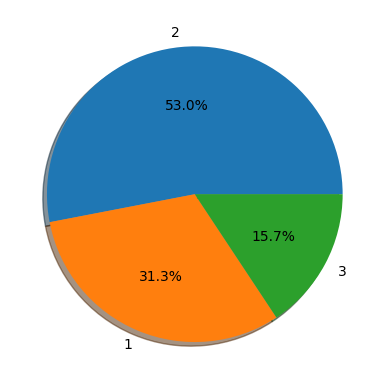

In [ ]:
# Biểu đồ tròn (pie chart) trực quan hóa tỷ lệ phân bổ của các giá trị trong cột "Credit_Score" 
label = df_cp.Credit_Score.value_counts().index   # giá trị duy nhất
label_count = df_cp.Credit_Score.value_counts().values  # số lần xuất hiện
plt.pie(data=df_cp, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()


In [ ]:
# # Vẽ heatmap về mối tương quan giữa các biến
# plt.figure(figsize=(10,5))
# c= df_cp.corr() # tính toán ma trận tương quan
# sns.heatmap(c,cmap="BrBG",annot=True) # tạo heatmap và hiển thị các giá trị tương quan lên heatmap
# c

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Annual_Income'}>],
       [<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>],
       [<Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Credit_Mix'}>],
       [<Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Payment_of_Min_Amount'}>],
       [<Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Monthly_Balance'}>,
        <Axes: title={'center':

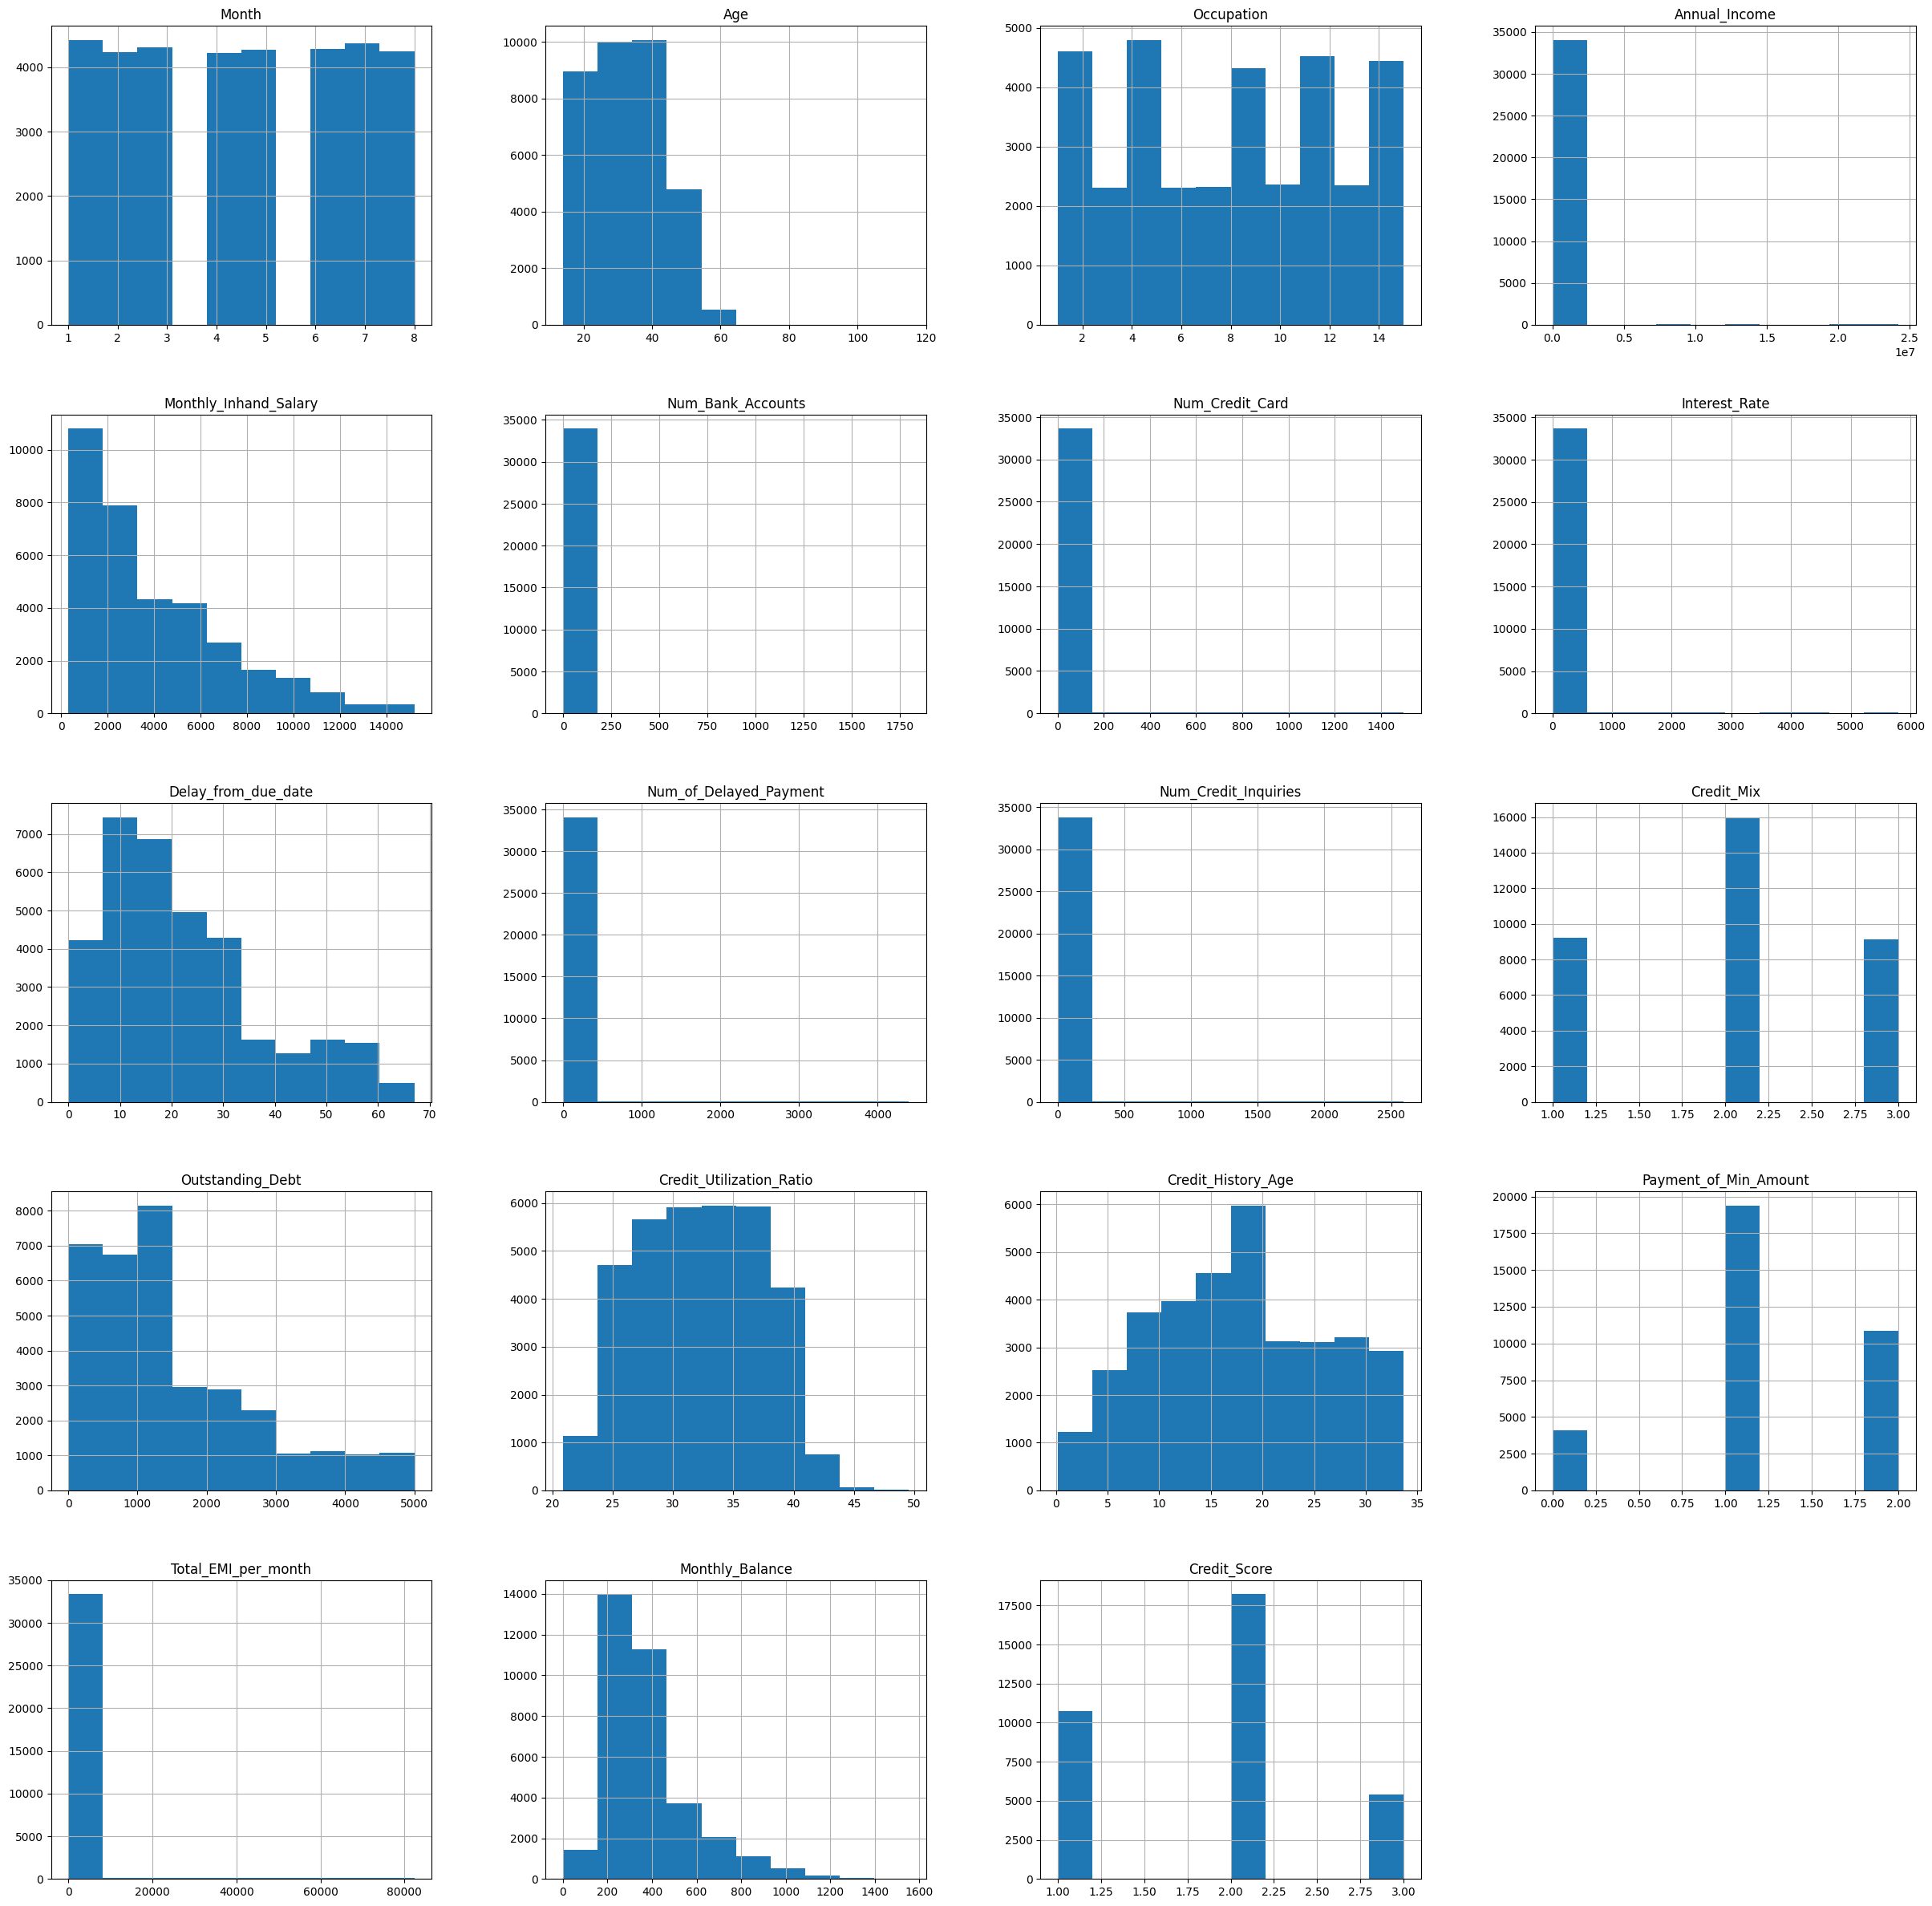

In [ ]:
# Cái này hiển thị chung
# Biểu đồ hiển thị các phân phối của các biến
df_cp.hist(figsize=(30, 30))

# 5. Bình thường hóa

In [ ]:
df_cp.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,7,23.0,1,19114.12,1824.843333,3,4,3,4,3,...,3,809.98,22.537593,22.583333,2,49.57,178.3440674122349,1,244.57,3
9,2,28.0,2,34847.84,3037.986667,2,4,6,1,7,...,3,605.03,38.550848,26.666667,2,18.82,40.39123782853101,6,484.59,3
12,5,28.0,2,34847.84,3037.986667,2,4,6,1,3,...,3,605.03,34.977895,26.916667,2,18.82,130.11542024292334,1,444.87,3
13,6,28.0,2,34847.84,3037.986667,2,4,6,1,3,...,3,605.03,33.381010,27.000000,2,18.82,43.477190144355745,6,481.51,3
15,8,28.0,2,34847.84,3037.986667,2,4,6,1,3,...,3,605.03,32.933856,27.166667,2,18.82,218.90434353388733,1,356.08,3


In [ ]:
# chuẩn hóa dữ liệu
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in df_cp[col_float]:
  df_cp[i] = scaler.fit_transform(df_cp[[i]])
df_cp.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,7,0.089109,1,0.000501,1824.843333,3,4,3,4,0.044776,...,3,0.162020,22.537593,0.669154,2,0.000548,178.3440674122349,1,0.157243,3
9,2,0.138614,2,0.001151,3037.986667,2,4,6,1,0.104478,...,3,0.121012,38.550848,0.791045,2,0.000174,40.39123782853101,6,0.311845,3
12,5,0.138614,2,0.001151,3037.986667,2,4,6,1,0.044776,...,3,0.121012,34.977895,0.798507,2,0.000174,130.11542024292334,1,0.286261,3
13,6,0.138614,2,0.001151,3037.986667,2,4,6,1,0.044776,...,3,0.121012,33.381010,0.800995,2,0.000174,43.477190144355745,6,0.309862,3
15,8,0.138614,2,0.001151,3037.986667,2,4,6,1,0.044776,...,3,0.121012,32.933856,0.805970,2,0.000174,218.90434353388733,1,0.229069,3


# 6. Mã hóa

In [ ]:
df_cp.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df_cp.dtypes

Month                         int64
Age                         float64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [ ]:
print(df_cp.columns.tolist())

['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [ ]:
# df_cp = pd.get_dummies(df_cp, prefix='Occupation', columns=['Occupation'], drop_first=False)
# df_cp.head()

In [ ]:
#Select all columns
feed = df_cp.columns.tolist()

In [ ]:
print(feed)

['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [ ]:
df_train_x = df_cp.drop('Credit_Score',axis = 1)
df_train_y = df_cp['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(x_train, y_train)

# Tạo DataFrame chứa các chỉ số độ quan trọng
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# Xuất chỉ số quan trọng của các cột
print(importances.head(23))


                          importance
feature                             
Outstanding_Debt               0.212
Credit_Mix                     0.209
Interest_Rate                  0.134
Num_Credit_Inquiries           0.097
Delay_from_due_date            0.068
Num_Credit_Card                0.062
Payment_of_Min_Amount          0.045
Credit_History_Age             0.040
Changed_Credit_Limit           0.038
Num_Bank_Accounts              0.028
Num_of_Delayed_Payment         0.020
Num_of_Loan                    0.018
Annual_Income                  0.008
Month                          0.006
Monthly_Inhand_Salary          0.006
Total_EMI_per_month            0.002
Monthly_Balance                0.002
Age                            0.001
Credit_Utilization_Ratio       0.001
Occupation                     0.001
Amount_invested_monthly        0.001
Payment_Behaviour              0.001


In [ ]:
# xóa các cột có chỉ số quan trọng thấp
delete_col = ['Annual_Income', 'Month', 'Monthly_Inhand_Salary','Age', 'Total_EMI_per_month', 'Credit_Utilization_Ratio', 'Occupation', 'Amount_invested_monthly', 'Monthly_Balance', 'Payment_Behaviour']
df_cp = df_cp.drop(delete_col , axis=1).copy()
df_cp.shape

(34345, 13)

In [ ]:
df_cp.dtypes

Num_Bank_Accounts           int64
Num_Credit_Card             int64
Interest_Rate               int64
Num_of_Loan                object
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Changed_Credit_Limit       object
Num_Credit_Inquiries      float64
Credit_Mix                  int64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount       int64
Credit_Score                int64
dtype: object

In [ ]:
df_cp


,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Credit_Score
6,3,4,3,4,0.044776,0.001819,11.27,4.0,3,0.162020,0.669154,2,3
9,2,4,6,1,0.104478,0.000227,7.42,2.0,3,0.121012,0.791045,2,3
12,2,4,6,1,0.044776,0.000227,6.42,2.0,3,0.121012,0.798507,2,3
13,2,4,6,1,0.044776,0.000000,5.42,2.0,3,0.121012,0.800995,2,3
15,2,4,6,1,0.044776,0.000910,5.42,2.0,3,0.121012,0.805970,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,1,4,5,3,0.074627,0.002729,5.38,3.0,3,0.124136,0.895522,0,3
99984,10,8,29,5,0.522388,0.005913,18.31,9.0,1,0.714603,0.164179,1,1
99985,10,8,29,5,0.492537,0.005686,23.31,9.0,1,0.714603,0.166667,1,1
99991,10,8,29,5,0.492537,0.005686,18.31,9.0,1,0.714603,0.181592,1,2


# 7. Mô hình

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## KNN

In [ ]:

# x[np.argmax(test)] # Xuất giá trị K tốt nhất

# Lua chon K de training tot mo hinh
error_rate_list = []
MAX_K = 50
accuracy_list = []
for i in range(1, MAX_K):
  knn2 = KNeighborsClassifier(n_neighbors=i, weights='distance').fit(x_train, y_train)
  y_predict = knn2.predict(x_test)
  error_rate_list.append(np.mean(y_predict != y_test))
  accuracy_list.append(accuracy_score(y_test, y_predict))

print(accuracy_score(y_test, y_predict))
print(error_rate_list)
print(accuracy_list)

0.5584510117921094
[0.4721211238899403, 0.4721211238899403, 0.46207599359440965, 0.45072062891250547, 0.4545057504731402, 0.44737225214732856, 0.4478089969427864, 0.4469355073518707, 0.4479545785412724, 0.44751783374581455, 0.44446062017760957, 0.44577085456398313, 0.44591643616246907, 0.44416945698063764, 0.44737225214732856, 0.44562527296549714, 0.443150385791236, 0.43936526423060124, 0.44052991701848887, 0.4383461930411996, 0.43907410103362937, 0.43907410103362937, 0.4408210802154608, 0.440093172223031, 0.4399475906245451, 0.43790944824574174, 0.43936526423060124, 0.43718154025331196, 0.44125782501091865, 0.440093172223031, 0.4409666618139467, 0.4399475906245451, 0.4399475906245451, 0.4424224777988062, 0.44169456980637645, 0.4414034066094046, 0.4440238753821517, 0.443150385791236, 0.4424224777988062, 0.4438782937836657, 0.4424224777988062, 0.4409666618139467, 0.4437327121851798, 0.4428592225942641, 0.443150385791236, 0.44329596738972193, 0.44358713058669386, 0.4437327121851798, 0.44

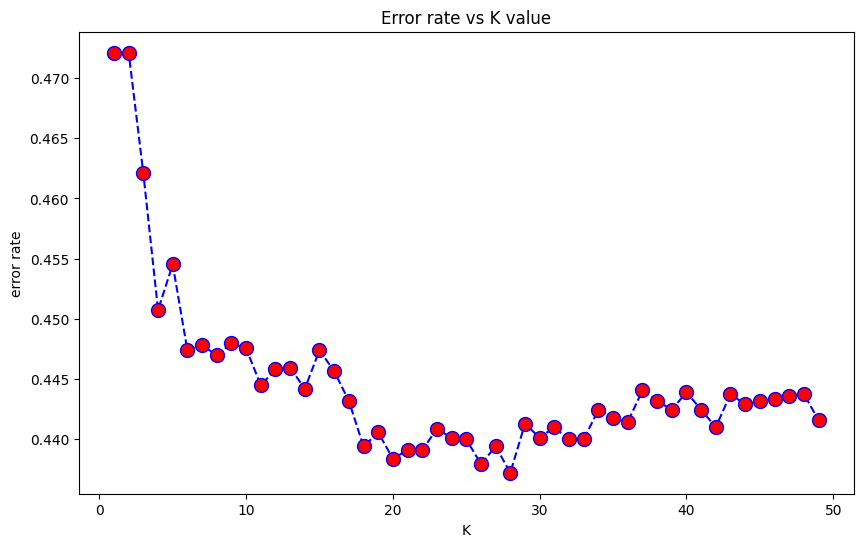

Min error = 0.43718154025331196, as K value = 27


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,MAX_K), error_rate_list, color='b', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('error rate')
plt.show()

KNN_k_value = error_rate_list.index(min(error_rate_list))
print(f'Min error = {min(error_rate_list)}, as K value = {error_rate_list.index(min(error_rate_list))}')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = KNN_k_value, weights='distance') # Khởi tạo thuật toán KNN có n_neighbors = 20
knn.fit(x_train, y_train) # training data

KNeighborsClassifier(n_neighbors=27, weights='distance')

In [ ]:
y_predict = knn.predict(x_test) # Dự đoán y cho tập x_test

In [ ]:
# Danh gia mo hinh
scores = cross_val_score(knn, x_test, y_test, cv=5) # dùng hàm cross_val_score đánh giá mô hình
tb_scores = np.mean(scores) # Xuất số điểm dự đoán
print(tb_scores*100) # Xuất số điểm dự đoán

52.39456942001651


In [ ]:
accuracy = accuracy_score(y_test, y_predict) # dùng hàm accuracy_score đánh giá mô hình
print(accuracy*100) # Xuất điểm 
print(classification_report(y_test, y_predict)) # dùng hàm classification_report đánh giá mô hình

56.06347357693987
              precision    recall  f1-score   support

           1       0.57      0.34      0.43      2193
           2       0.56      0.84      0.67      3581
           3       0.45      0.09      0.15      1095

    accuracy                           0.56      6869
   macro avg       0.53      0.42      0.42      6869
weighted avg       0.55      0.56      0.51      6869



## Decision tree

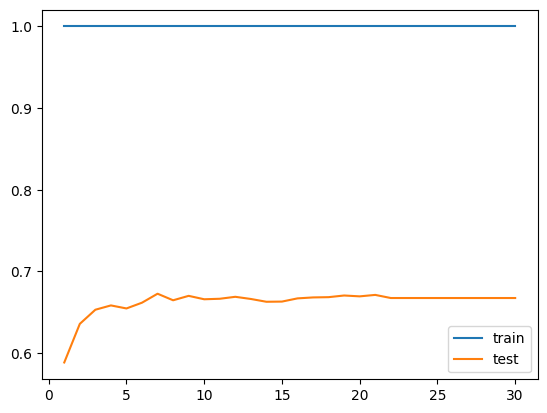

7

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# find max_features
x = list(range(1, 31))
train = []
test = []

for val in x: # khởi tạo loop cho max_features đã khởi tạo
    tree2 = DecisionTreeClassifier(random_state = 42,
                                     max_features = val)
    cv = cross_validate(tree2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

dt_max_features = x[np.argmax(test)]
x[np.argmax(test)] # Xuất giá trị tốt nhất

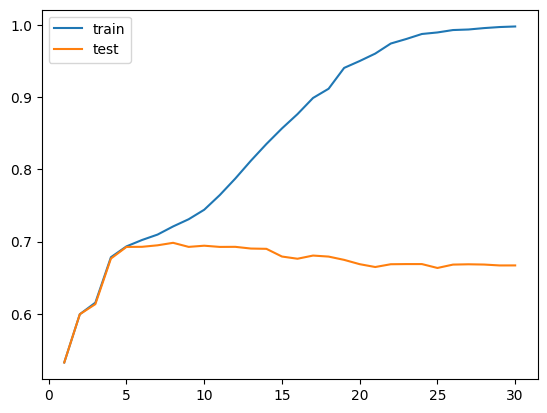

8

In [ ]:
# find max_depth
x = list(range(1, 31))
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    tree2 = DecisionTreeClassifier(random_state = 42,
                                   max_features = dt_max_features,
                                   max_depth = val)
    cv = cross_validate(tree2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

dt_max_depth = x[np.argmax(test)]
x[np.argmax(test)] # Xuất giá trị tốt nhất

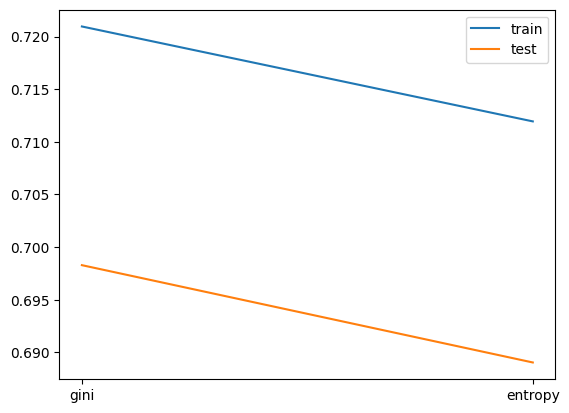

'gini'

In [ ]:
# criterion
x = ['gini', 'entropy']
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    tree2 = DecisionTreeClassifier(random_state=42,
                                   max_features = dt_max_features,
                                   max_depth = dt_max_depth,
                                   criterion = val)
    cv = cross_validate(tree2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

dt_criterion = x[np.argmax(test)]
x[np.argmax(test)] # Xuất giá trị tốt nhất

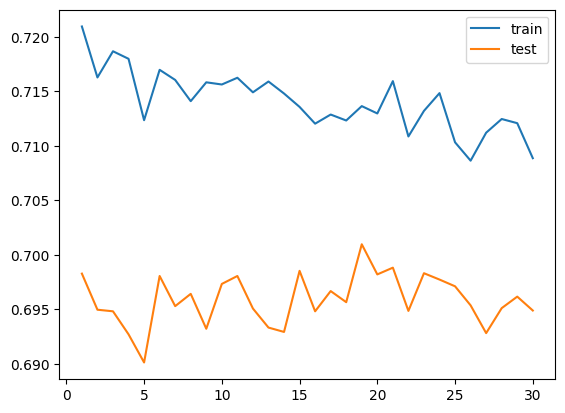

19

In [ ]:
# min_samples_leaf
x = list(range(1, 31))
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    tree2 = DecisionTreeClassifier(random_state=42,
                                   max_features = dt_max_features,
                                   max_depth = dt_max_depth,
                                   criterion = dt_criterion,
                                   min_samples_leaf = val)
    cv = cross_validate(tree2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

dt_min_samples_leaf = x[np.argmax(test)]
x[np.argmax(test)] # Xuất giá trị tốt nhất

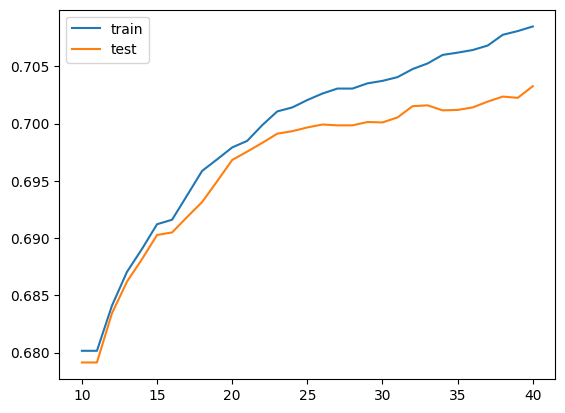

40

In [ ]:
# max_leaf_nodes
x = list(range(10, 41))
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    tree2 = DecisionTreeClassifier(random_state = 42,
                                   max_features = dt_max_features,
                                   max_depth = dt_max_depth,
                                   criterion = dt_criterion,
                                   min_samples_leaf = dt_min_samples_leaf,
                                   max_leaf_nodes = val)
    cv = cross_validate(tree2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

dt_max_leaf_nodes = x[np.argmax(test)]
x[np.argmax(test)] # Xuất giá trị tốt nhất

In [ ]:
dtc = DecisionTreeClassifier(criterion = dt_criterion, max_depth = dt_max_depth, max_features = dt_max_features, min_samples_leaf = dt_min_samples_leaf, max_leaf_nodes = dt_max_leaf_nodes) # tổng hợp lại
dtc.fit(x_train, y_train) # training data

DecisionTreeClassifier(max_depth=8, max_features=7, max_leaf_nodes=40,
                       min_samples_leaf=19)

In [ ]:
y_pred = dtc.predict(x_test)

In [ ]:
# Danh gia mo hinh
scores = cross_val_score(dtc, x_test, y_test, cv=5) # dùng hàm cross_val_score đánh giá mô hình
tb_scores = np.mean(scores) # Xuất điểm 
print(tb_scores*100) # Xuất số điểm dự đoán

68.64167649968036


In [ ]:
accuracy = accuracy_score(y_test, y_pred) # dùng hàm accuracy_score đánh giá mô hình
print(accuracy*100) # Xuất điểm
print(classification_report(y_test, y_pred)) # dùng hàm classification_report đánh giá mô hình

70.02474887174262
              precision    recall  f1-score   support

           1       0.73      0.65      0.69      2193
           2       0.77      0.70      0.73      3581
           3       0.52      0.80      0.63      1095

    accuracy                           0.70      6869
   macro avg       0.68      0.72      0.69      6869
weighted avg       0.72      0.70      0.70      6869



## Random Forest

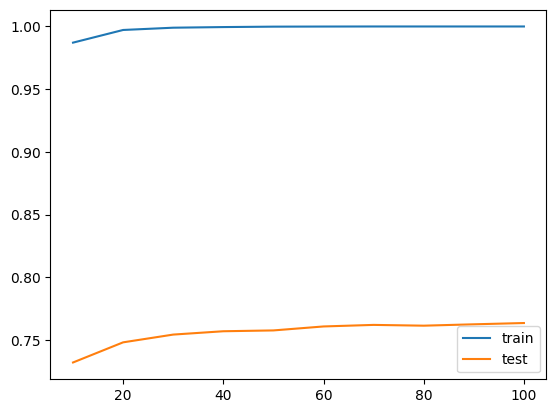

100

In [ ]:
# find n_estimators: số lượng cây quyết định
x = list(range(10, 101, 10))
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    rf2 = RandomForestClassifier(random_state = 42,
                                 n_estimators = val)
    cv = cross_validate(rf2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

rf_n_estimators = x[np.argmax(test)]
x[np.argmax(test)] # Xuất giá trị tốt nhất

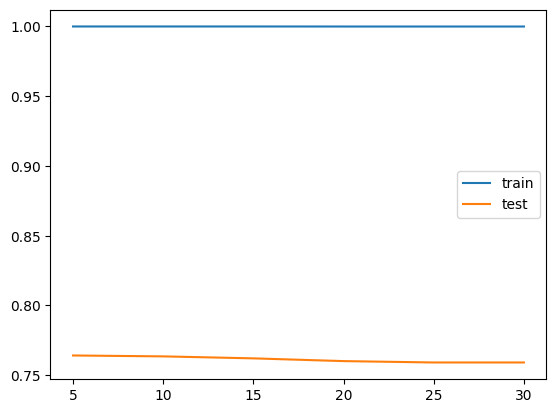

5

In [ ]:
# find max_features: số lượng đặc trưng
x = list(range(5, 31, 5))
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    rf2 = RandomForestClassifier(random_state = 42,
                                 n_estimators = rf_n_estimators,
                                 max_features = val)
    cv = cross_validate(rf2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

rf_max_features = x[np.argmax(test)]
x[np.argmax(test)] # Xuất giá trị tốt nhất

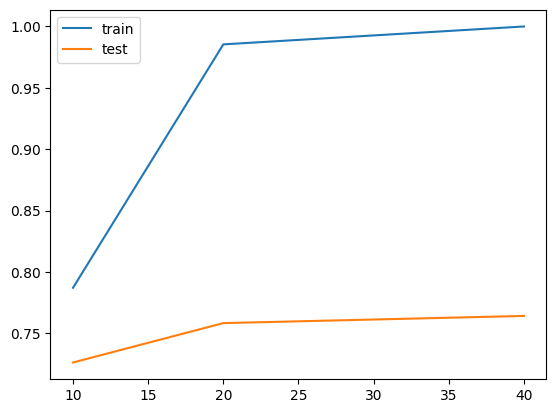

40

In [ ]:
# find max_depth: độ sâu tối đa
x = [10,20,40]
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    rf2 = RandomForestClassifier(random_state = 42,
                                 n_estimators = rf_n_estimators,
                                 max_features = rf_max_features,
                                 max_depth = val)
    cv = cross_validate(rf2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

rf_max_depth = x[np.argmax(test)]
x[np.argmax(test)] # Xuất giá trị tốt nhất

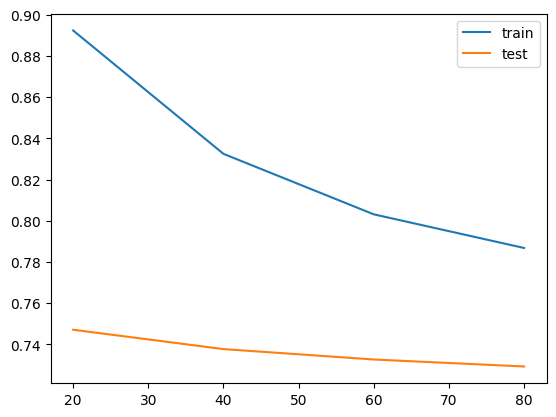

20

In [ ]:
# find min_samples_split: mẫu tối thiểu
x = [20,40,60,80]
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    rf2 = RandomForestClassifier(random_state = 42,
                                 n_estimators = rf_n_estimators,
                                 max_features = rf_max_features,
                                 max_depth = rf_max_depth,
                                 min_samples_split = val)
    cv = cross_validate(rf2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

rf_min_samples_split = x[np.argmax(test)]
x[np.argmax(test)] # Xuất giá trị tốt nhất

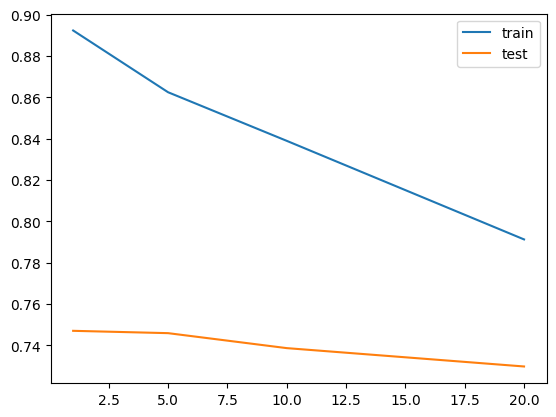

1

In [ ]:
# find min_samples_leaf: mẫu tối thiểu trong 1 lá
x = [1,5,10,20]
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    rf2 = RandomForestClassifier(random_state = 42,
                                 n_estimators = rf_n_estimators,
                                 max_features = rf_max_features,
                                 max_depth = rf_max_depth,
                                 min_samples_split = rf_min_samples_split,
                                 min_samples_leaf = val)
    cv = cross_validate(rf2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

rf_min_samples_leaf = x[np.argmax(test)]
x[np.argmax(test)] # Xuất giá trị tốt nhất

In [ ]:
rf = RandomForestClassifier(random_state = 42,
                            n_estimators = rf_n_estimators,
                            max_features = rf_max_features,
                            max_depth = rf_max_depth,
                            min_samples_split = rf_min_samples_split,
                            min_samples_leaf = rf_min_samples_leaf
                            ) # Tổng hợp lại
rf.fit(x_train, y_train) # training data

RandomForestClassifier(max_depth=40, max_features=5, min_samples_split=20,
                       random_state=42)

In [ ]:
y_pred = rf.predict(x_test) # Dự đoán cho tập dữ liệu test

In [ ]:
# Danh gia mo hinh
scores = cross_val_score(rf, x_test, y_test, cv=5) # dùng hàm cross_val_score để đánh giá mô hình với cv = 5
tb_scores = np.mean(scores) # Xuất điểm
print(tb_scores*100)

71.349524145747


In [ ]:
accuracy = accuracy_score(y_test, y_pred) # dùng hàm accuracy_score đánh giá mô hình
print(accuracy*100) # Xuất điểm
print(classification_report(y_test, y_pred)) # dùng hàm classification_report đánh giá mô hình

75.25112825738827
              precision    recall  f1-score   support

           1       0.77      0.73      0.75      2193
           2       0.77      0.79      0.78      3581
           3       0.66      0.67      0.66      1095

    accuracy                           0.75      6869
   macro avg       0.73      0.73      0.73      6869
weighted avg       0.75      0.75      0.75      6869



In [ ]:
from google.colab import files
df_cp.to_csv('clean_data.csv', index=False)
# tải file về máy tính
files.download('clean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>